In [ ]:
print("Hello World!")

Importing Diabetes Prediction Dataset

In [1]:
import pandas as pd

diabetes_data = pd.read_csv(r"C:\Users\sidli\Downloads\Python_Projects\Machine_Learning_Practice\Data\diabetes_prediction_dataset.csv") 
# r stands for raw string, it prevents escape characters from being processed
# escape characters are used in file paths, like \n for newline, \t for tab, etc.
print(diabetes_data.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


Checking Sample From <diabetes_data> Dataframe

In [2]:
diabetes_data["diabetes"].value_counts()

diabetes_data["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Generating Histograms To Understand Distribution of Feature Vectors and Target Vectors (Numeric Features Only)

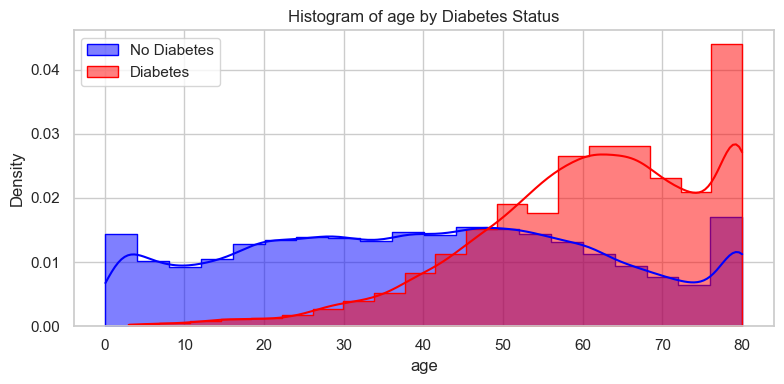

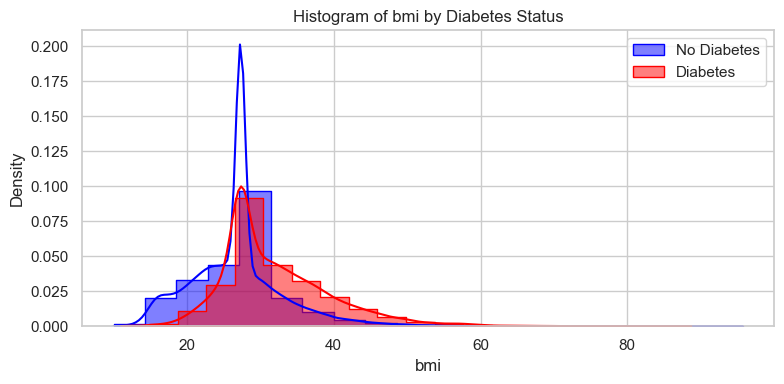

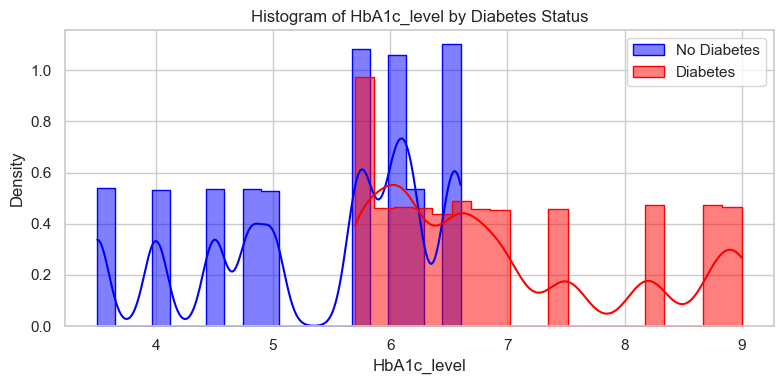

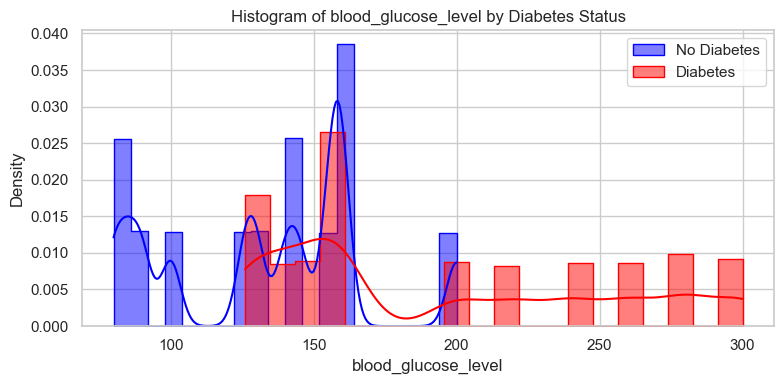

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

# List of numerical features to plot
num_features = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

# Filter by diabetes status
diabetes_data_no = diabetes_data[diabetes_data["diabetes"] == 0]
diabetes_data_yes = diabetes_data[diabetes_data["diabetes"] == 1]

# Create histograms for each feature by diabetes label
for feature in num_features:

    # Plot histograms
    plt.figure(figsize=(8, 4))
    sns.histplot(diabetes_data_no[feature], bins=20, color="blue", label="No Diabetes", kde=True, stat="density", element="step")
    sns.histplot(diabetes_data_yes[feature], bins=20, color="red", label="Diabetes", kde=True, stat="density", element="step")

    # Formatting
    plt.title(f"Histogram of {feature} by Diabetes Status")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

Altering <"smoking_history"> Column

In [28]:
# Normalize and standardize the column
diabetes_data["smoking_history"] = diabetes_data["smoking_history"].str.lower().str.strip()

# Replace values as before
diabetes_data["smoking_history"] = diabetes_data["smoking_history"].replace(
    ["former", "not current", "ever"],
    "former"
)

Generating Countplot To Understand Distribution of Feature Vectors and Target Vectors (Categorical Features Only)

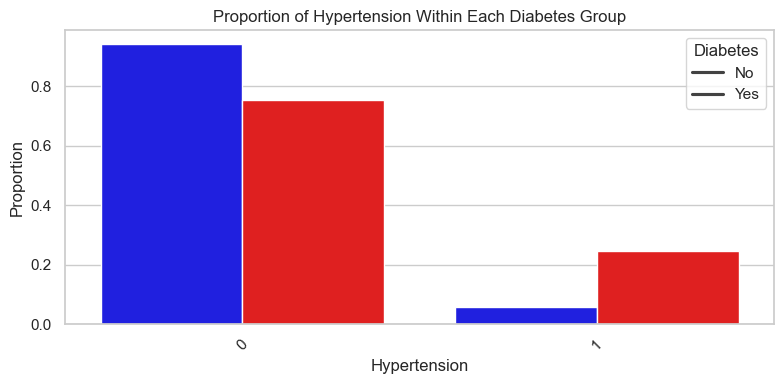

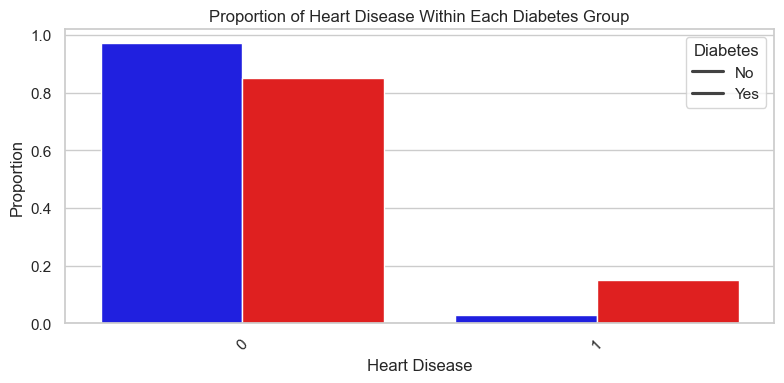

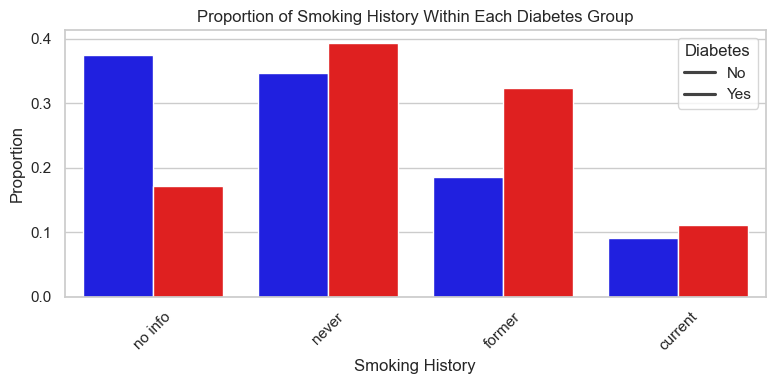

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of numerical features to plot
cat_features = ["hypertension","heart_disease","smoking_history"]

for feature in cat_features:

    # Group by diabetes → then normalize within each diabetes class
    proportion_diabetes_data = (
        diabetes_data.groupby("diabetes")[feature]
        .value_counts(normalize=True)
        .rename("proportion")
        .reset_index()
    )

    # Plot as grouped bar chart
    plt.figure(figsize=(8, 4))
    sns.barplot(
        data=proportion_diabetes_data,
        x=feature,
        y="proportion",
        hue="diabetes",
        palette={0: "blue", 1: "red"}
    )

    plt.title(f"Proportion of {feature.replace('_', ' ').title()} Within Each Diabetes Group")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel("Proportion")
    plt.legend(title="Diabetes", labels=["No", "Yes"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()